In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')

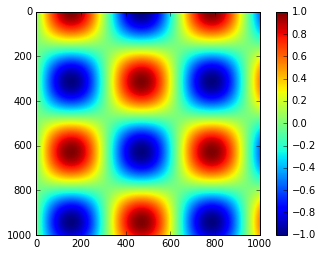

In [3]:
x = np.linspace(0,10,1000)
I = np.sin(x)*np.cos(x[:,np.newaxis])
plt.imshow(I)
plt.colorbar();

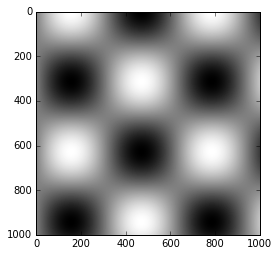

In [4]:
plt.imshow(I, cmap='gray');

In [5]:
from matplotlib.colors import LinearSegmentedColormap

In [6]:
def grayscale_map(cmap):
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    RGB_weight = [0.229,0.587,0.114]
    luminance = np.sqrt(np.dot(colors[:,:3] ** 2, RGB_weight))
    colors[:,:3] = luminance[:,np.newaxis]
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)

In [7]:
def view_colormap(cmap):
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    cmap = grayscale_map(cmap)
    grayscale = cmap(np.arange(cmap.N))
    fig, ax = plt.subplots(2,figsize=(6,2),subplot_kw=dict(xticks=[],yticks=[]))
    ax[0].imshow([colors], extent=[0,10,0,1])
    ax[1].imshow([grayscale],extent=[0,10,0,1])

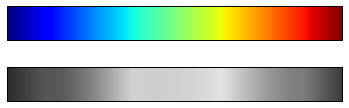

In [8]:
view_colormap('jet')

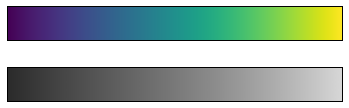

In [9]:
view_colormap('viridis')

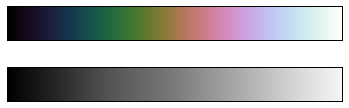

In [10]:
view_colormap('cubehelix')

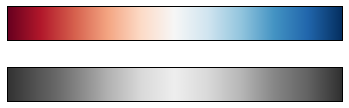

In [11]:
view_colormap('RdBu')

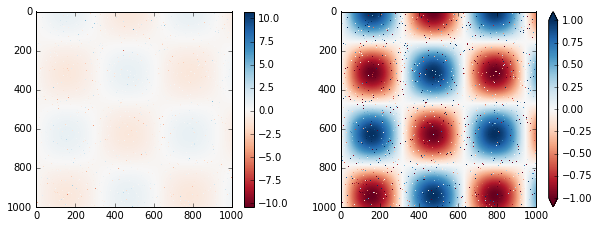

In [12]:
speckles = (np.random.random(I.shape) < 0.01)
I[speckles]  = np.random.normal(0, 3, np.count_nonzero(speckles))
plt.figure(figsize=(10,3.5))
plt.subplot(1,2,1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(I,cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1,1);

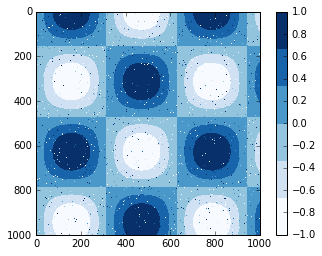

In [13]:
plt.imshow(I, cmap=plt.get_cmap('Blues',6))
plt.colorbar()
plt.clim(-1,1);

In [14]:
from sklearn.datasets import load_digits

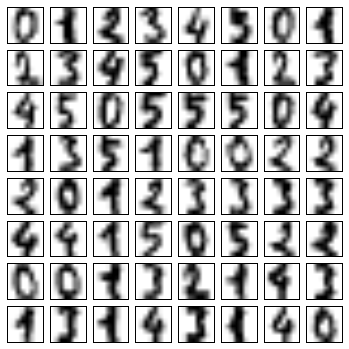

In [15]:
digits = load_digits(n_class=6)
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [16]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

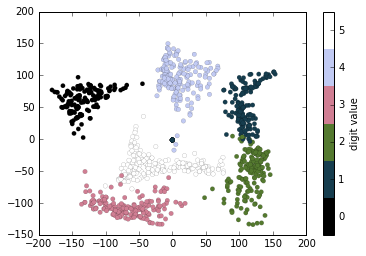

In [17]:
plt.scatter(projection[:,0], projection[:,1], lw=0.1,c=digits.target, cmap=plt.cm.get_cmap('cubehelix',6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)